# Once you get the interests of someone, can you guess how depressed this person is?

comes from https://www.kaggle.com/datasets/miroslavsabo/young-people-survey?resource=download

Limitations: 

- not clearly the liking generalization process that we investigate in study 4b -> hidden behind through the reasoning: if depressed were less narrower in their liking, they would have more interests (because of exploration)
=> need the longitudinal data

- may explain rumination rather than underestimation of other things

### Get Data

In [46]:
import pandas as pd
import sklearn 
from sklearn.cluster import KMeans
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("./data/raw/responses.csv")

In [47]:
data.columns.to_list()[0]

'Music'

In [48]:
id_to_column = {i:list(data.columns.to_list())[i] for i in range(len(data.columns))}

In [49]:
id_to_column = {i:list(data.columns.to_list())[i] for i in range(len(data.columns))}
variable_groups = {"music_preferences":[id_to_column[i] for i in range(19)],
                   "movie_preferences":[id_to_column[i] for i in range(19,31)],
                   "hobbies":[id_to_column[i] for i in range(31,63)],
                   "phobias":[id_to_column[i] for i in range(63,73)],
                   "health_habits":[id_to_column[i] for i in range(73,76)],
                   "personality_traits_opinions":[id_to_column[i] for i in range(76,133)],
                   "spending_habits":[id_to_column[i] for i in range(133,140)],
                   "demographics":[id_to_column[i] for i in range(140,150)]}


data[variable_groups["hobbies"]]

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
1006,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
1007,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
1008,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


In [6]:
data[variable_groups["personality_traits_opinions"]][['Life struggles', 'Happiness in life']]

,Life struggles,Happiness in life
0,1.0,4.0
1,1.0,4.0
2,4.0,4.0
3,3.0,2.0
4,2.0,3.0
...,...,...
1005,4.0,4.0
1006,1.0,4.0
1007,5.0,3.0
1008,5.0,3.0


In [7]:
data

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


### Embeddings

In [9]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer('all-MiniLM-L6-v2') # r2 10.5% of variance in corr explained 
model = SentenceTransformer("all-mpnet-base-v2") # r2 16% of variance in corr explained

"""
def create_embeddings(papers):
    sentences = [
        f"{p['Summary']} {p['Methods']} {p['Results']}" for p in papers.values()
    ]
    return np.array([model.encode(sent) for sent in sentences])
"""

def create_embeddings(text):
    return model.encode(text)


def get_cosine_similarity(v0,v1, origin = 0):
    _v0 = v0 - origin
    _v1 = v1 - origin
    return np.dot(_v0,_v1)/(np.linalg.norm(_v0)*np.linalg.norm(_v1))

In [10]:
hobby_name_to_embedding = {} 

for col in data[variable_groups["hobbies"]].columns:
    # TODO: does it improve the pipeline if I gave f"hobby: {col}" instead? => drop 4% of variance of corr occurence explained (out of 10%)
    hobby_name_to_embedding[col] = create_embeddings(col)


hobby_name_to_embedding

{'History': array([-6.10675523e-03,  7.20046237e-02,  7.38958595e-03, -5.96248321e-02,
        -3.33431438e-02,  1.05583202e-02,  1.33192097e-03, -1.86007805e-02,
        -3.31140519e-03,  8.30900669e-03,  7.99896196e-02, -3.96870710e-02,
         1.34050166e-02, -4.80367765e-02,  8.35496746e-03, -1.06598949e-02,
         2.80623790e-03,  8.01866800e-02, -5.64678982e-02,  4.38703708e-02,
        -3.55452895e-02, -1.46194361e-02,  1.09311705e-02, -2.35777721e-02,
         1.79650262e-03, -1.38871297e-02, -1.99106876e-02, -4.20543551e-02,
        -1.55581320e-02, -3.65677886e-02,  2.24895794e-02,  1.18069397e-02,
         2.61419062e-02, -3.32107544e-02,  1.84742294e-06, -1.66476872e-02,
         7.33487681e-03,  9.92111955e-03, -2.91566271e-02,  3.44740935e-02,
         2.40822099e-02,  8.29783902e-02, -6.24431036e-02, -2.75429133e-02,
        -1.97593197e-02,  9.31826700e-03,  2.63990704e-02, -1.40394559e-02,
        -1.75568461e-02,  4.35913131e-02,  1.43975243e-02, -4.79224958e-02,
 

In [11]:
pd.DataFrame(hobby_name_to_embedding)

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,-0.006107,0.031566,0.005401,-0.009083,0.002469,-0.021348,0.006238,-0.008944,0.028204,0.022409,...,-0.012044,-0.073596,0.029136,0.013885,0.029382,0.022758,-0.006878,-0.010969,-0.015964,0.045368
1,0.072005,0.037165,0.057643,-0.024937,-0.054461,0.022456,0.034078,0.113717,-0.015665,-0.059920,...,0.000116,-0.043540,0.056433,0.079921,-0.019858,-0.025358,-0.011607,-0.010515,-0.023510,0.076200
2,0.007390,-0.045607,0.022126,-0.003192,-0.016998,-0.005497,0.000509,-0.016030,0.002777,-0.019272,...,-0.030498,-0.024373,-0.006560,-0.003071,-0.012606,-0.062173,-0.011571,-0.016044,-0.000965,-0.045351
3,-0.059625,-0.038019,0.029251,-0.004726,-0.011997,-0.037551,0.047292,0.000712,-0.039408,-0.033306,...,0.024448,0.026305,0.028898,-0.027267,0.015901,-0.024134,-0.003728,-0.002332,0.014756,-0.039187
4,-0.033343,-0.024964,-0.042225,-0.036708,0.001880,-0.019584,-0.004212,0.025411,-0.006714,-0.008954,...,0.038288,0.064026,-0.009620,0.042299,0.028177,-0.029091,-0.044252,-0.026482,0.044269,0.042919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.003161,-0.020629,-0.031333,-0.081116,-0.026752,0.047977,0.102313,-0.026668,-0.007201,-0.008882,...,0.101486,0.071118,0.034946,-0.008705,0.023959,0.019516,0.026665,-0.002085,-0.027101,-0.041499
764,0.003014,0.043445,0.020191,-0.015155,0.021341,-0.046634,-0.003162,0.001303,0.033822,0.036611,...,0.012590,-0.004573,-0.035595,-0.056987,-0.017309,0.003245,-0.009217,-0.020502,-0.000190,-0.045990
765,0.041758,0.042055,-0.015186,0.027702,0.036143,0.014437,0.015594,0.009493,0.030369,0.017073,...,0.046482,0.023507,-0.025259,0.019012,0.012214,0.015332,0.035116,0.052791,0.033237,0.034924
766,0.015662,0.021863,0.001571,0.008601,-0.000287,-0.065963,-0.045406,-0.008819,0.042188,-0.044214,...,0.047049,0.049397,0.022621,-0.021405,-0.016818,0.015213,0.001226,0.052802,-0.010261,0.039156


In [16]:
mean_emb_hobbies = pd.DataFrame(hobby_name_to_embedding).values.mean(axis=1)
mean_emb_hobbies

array([ 8.79535452e-03,  1.33524500e-02, -1.10978223e-02, -4.28039301e-03,
       -6.17201673e-03,  1.19611742e-02, -6.31349813e-03,  9.46959853e-03,
        3.43692442e-03,  1.46732256e-02,  4.14043181e-02, -1.19412253e-02,
        1.37092229e-02, -3.22375353e-03,  1.49055356e-02, -5.22351414e-02,
        1.14685018e-02, -3.07376124e-03, -3.87664475e-02, -9.21993237e-03,
       -2.90891174e-02,  1.17489602e-02, -1.17060135e-03, -5.66286920e-03,
        1.25156827e-02, -2.87785474e-02,  1.17126456e-03, -2.01252401e-02,
       -3.35607701e-03,  1.27223106e-02,  1.11944815e-02, -2.25018263e-02,
        2.12116241e-02, -1.84396468e-02,  1.70195324e-06, -1.71750560e-02,
       -3.51608091e-04, -1.16048558e-02,  3.50413634e-03, -1.02682412e-02,
        2.82439608e-02,  3.10558025e-02, -1.39577426e-02,  1.19879683e-02,
       -1.02243219e-02, -1.66901872e-02,  4.12696153e-02, -1.96477361e-02,
       -2.66104154e-02,  1.62982531e-02,  2.15680804e-03, -1.71427242e-02,
       -5.34594022e-02, -

In [22]:
emb_hobby = create_embeddings("hobby")
emb_hobby

array([-1.05127171e-02,  1.12448312e-01, -1.16462633e-02,  2.46664602e-02,
       -3.90276723e-02,  9.39498562e-03, -7.20190117e-03, -1.47104636e-02,
       -9.65121686e-02,  2.75430437e-02,  1.56178679e-02, -5.25873573e-03,
        1.84302926e-02, -3.12814526e-02,  1.53061515e-02,  6.49137748e-03,
       -1.21722685e-03, -2.72948332e-02, -6.18159883e-02, -1.11304130e-03,
        1.73737127e-02,  1.12740844e-02,  1.44318435e-02,  1.40035022e-02,
        6.43325672e-02, -4.36930992e-02,  2.58852579e-02, -3.38070691e-02,
       -4.46159430e-02,  3.68948840e-02,  6.80852160e-02, -4.23274823e-02,
        4.02744412e-02,  9.25978366e-03,  1.70996816e-06,  2.32766736e-02,
        2.06265375e-02, -2.13234574e-02,  1.17877265e-02, -1.72240585e-02,
        1.33374885e-01,  7.07234815e-02, -8.21194798e-03,  1.29806343e-02,
       -5.54935867e-03, -2.44017523e-02,  3.68152894e-02,  2.30670418e-03,
       -8.45306367e-02, -1.61722042e-02,  1.00570153e-02,  8.32605921e-03,
       -7.91906193e-02, -

In [23]:
hobby_names = list(hobby_name_to_embedding.keys())
similarity_matrix = np.ones((len(hobby_name_to_embedding),len(hobby_name_to_embedding)))

for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix[i,j] = get_cosine_similarity(hobby_name_to_embedding[hobby_names[i]],hobby_name_to_embedding[hobby_names[j]])

# symmetric
for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix[j,i] = similarity_matrix[i,j]

similarity_matrix

array([[1.        , 0.4505066 , 0.48368496, ..., 0.22956087, 0.23083349,
        0.29964763],
       [0.4505066 , 1.        , 0.3777957 , ..., 0.22979635, 0.27981126,
        0.33633283],
       [0.48368496, 0.3777957 , 1.        , ..., 0.25854936, 0.21182296,
        0.29881385],
       ...,
       [0.22956087, 0.22979635, 0.25854936, ..., 1.        , 0.33452097,
        0.31732064],
       [0.23083349, 0.27981126, 0.21182296, ..., 0.33452097, 1.        ,
        0.23421802],
       [0.29964763, 0.33633283, 0.29881385, ..., 0.31732064, 0.23421802,
        1.        ]])

In [25]:
hobby_names = list(hobby_name_to_embedding.keys())
similarity_matrix_mean_origin = np.ones((len(hobby_name_to_embedding),len(hobby_name_to_embedding)))

for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix_mean_origin[i,j] = get_cosine_similarity(hobby_name_to_embedding[hobby_names[i]],
                                                       hobby_name_to_embedding[hobby_names[j]],
                                                       origin=mean_emb_hobbies)

# symmetric
for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix_mean_origin[j,i] = similarity_matrix_mean_origin[i,j]

similarity_matrix_mean_origin

array([[ 1.        ,  0.07719302,  0.18255271, ..., -0.11372378,
        -0.1147428 , -0.10234688],
       [ 0.07719302,  1.        , -0.00822691, ..., -0.1376195 ,
        -0.06589407, -0.06889018],
       [ 0.18255271, -0.00822691,  1.        , ..., -0.03863974,
        -0.10708915, -0.06714522],
       ...,
       [-0.11372378, -0.1376195 , -0.03863974, ...,  1.        ,
         0.13899435,  0.04908775],
       [-0.1147428 , -0.06589407, -0.10708915, ...,  0.13899435,
         1.        , -0.0697147 ],
       [-0.10234688, -0.06889018, -0.06714522, ...,  0.04908775,
        -0.0697147 ,  1.        ]])

In [24]:
hobby_names = list(hobby_name_to_embedding.keys())
similarity_matrix_hobby_origin = np.ones((len(hobby_name_to_embedding),len(hobby_name_to_embedding)))

for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix_hobby_origin[i,j] = get_cosine_similarity(hobby_name_to_embedding[hobby_names[i]],
                                                       hobby_name_to_embedding[hobby_names[j]],
                                                       origin=emb_hobby)

# symmetric
for i in range(len(hobby_name_to_embedding)):
    for j in range(i+1,len(hobby_name_to_embedding)):
        similarity_matrix_hobby_origin[j,i] = similarity_matrix_hobby_origin[i,j]

similarity_matrix_hobby_origin

array([[1.        , 0.59477514, 0.63370728, ..., 0.3719182 , 0.43038592,
        0.44865483],
       [0.59477514, 1.        , 0.56574702, ..., 0.38577724, 0.47655883,
        0.48849782],
       [0.63370728, 0.56574702, 1.        , ..., 0.43389761, 0.44770616,
        0.48119828],
       ...,
       [0.3719182 , 0.38577724, 0.43389761, ..., 1.        , 0.46751764,
        0.41330254],
       [0.43038592, 0.47655883, 0.44770616, ..., 0.46751764, 1.        ,
        0.40684021],
       [0.44865483, 0.48849782, 0.48119828, ..., 0.41330254, 0.40684021,
        1.        ]])

In [26]:
corr_matrix = data[variable_groups["hobbies"]].corr().values #TODO polychoric

In [27]:
abs_diff_matrix = np.zeros((len(data),len(hobby_names),len(hobby_names)))
for i in range(len(hobby_names)):
    for j in range(i+1,len(hobby_names)):
        abs_diff_matrix[:,i,j] = np.abs((data[hobby_names[i]] - data[hobby_names[j]]).values)
        abs_diff_matrix[:,j,i] = abs_diff_matrix[:,i,j] # symmetric

avg_abs_diff_matrix = np.nanmean(abs_diff_matrix,axis=0)
print(avg_abs_diff_matrix.shape)

# Standard scaling
avg_abs_diff_matrix = (avg_abs_diff_matrix - np.mean(avg_abs_diff_matrix))/(np.std(avg_abs_diff_matrix))

(32, 32)


In [30]:
dataset =  {"semantic_similarity":[], "semantic_similarity_mean_origin": [], "semantic_similarity_hobby_origin":[],
            "correlation_occurence":[],"avg_abs_diff":[],"index":[]}
for i in range(len(hobby_names)):
    for j in range(i+1,len(hobby_names)):

        dataset["index"].append(f"{hobby_names[i]} <-> {hobby_names[j]}") 
        dataset["semantic_similarity"].append(similarity_matrix[i,j])
        dataset["semantic_similarity_mean_origin"].append(similarity_matrix_mean_origin[i,j])
        dataset["semantic_similarity_hobby_origin"].append(similarity_matrix_hobby_origin[i,j])
        dataset["correlation_occurence"].append(corr_matrix[i,j])
        dataset["avg_abs_diff"].append(avg_abs_diff_matrix[i,j])

dataset = pd.DataFrame(dataset)
dataset

,semantic_similarity,semantic_similarity_mean_origin,semantic_similarity_hobby_origin,correlation_occurence,avg_abs_diff,index
0,0.450507,0.077193,0.594775,0.286310,-1.060618,History <-> Psychology
1,0.483685,0.182553,0.633707,0.400786,-0.950699,History <-> Politics
2,0.405106,0.061586,0.604554,0.011761,0.308351,History <-> Mathematics
3,0.374468,0.033725,0.588165,0.082458,0.367780,History <-> Physics
4,0.365968,0.016093,0.527456,0.022613,-0.215092,History <-> Internet
...,...,...,...,...,...,...
491,0.233213,-0.104473,0.436964,0.008205,0.082702,Theatre <-> Adrenaline sports
492,0.256395,-0.162789,0.420058,0.090273,0.156873,Theatre <-> Pets
493,0.334521,0.138994,0.467518,0.258893,0.526456,Fun with friends <-> Adrenaline sports
494,0.317321,0.049088,0.413303,0.079195,0.004777,Fun with friends <-> Pets


<Axes: >

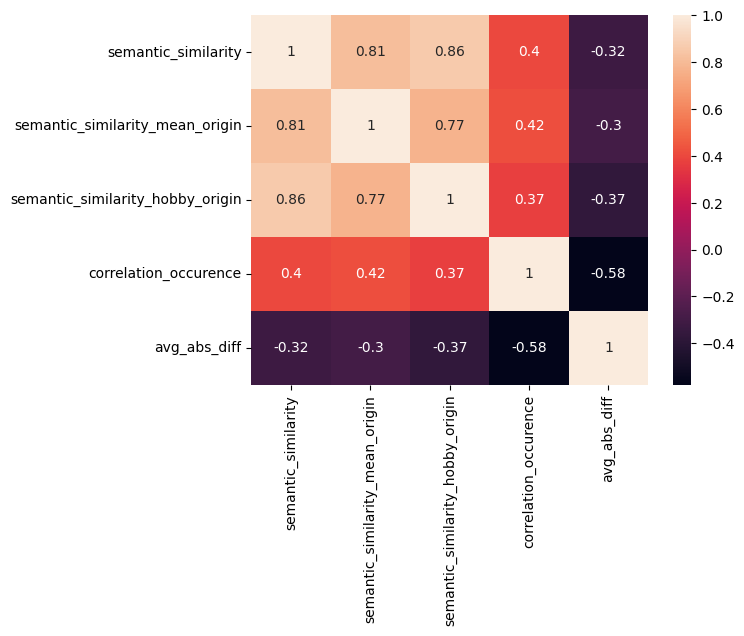

In [ ]:
sns.heatmap(dataset[["semantic_similarity","semantic_similarity_mean_origin","semantic_similarity_hobby_origin","correlation_occurence","avg_abs_diff"]].corr(), annot=True)

In [52]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=dataset["semantic_similarity"],name="semantic similarity"))
fig.add_trace(go.Histogram(x=dataset["semantic_similarity_mean_origin"],name="semantic similarity mean origin"))
fig.add_trace(go.Histogram(x=dataset["semantic_similarity_hobby_origin"],name="semantic similarity 'hobby' origin"))
fig.show()

### Based on correlation

,semantic_similarity,correlation_occurence
semantic_similarity,1.000000,0.399671
correlation_occurence,0.399671,1.000000


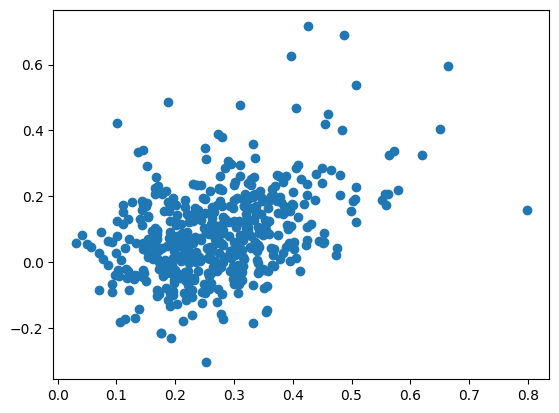

In [36]:
plt.scatter(dataset["semantic_similarity"],dataset["correlation_occurence"])

dataset[["semantic_similarity","correlation_occurence"]].corr()

,semantic_similarity_mean_origin,correlation_occurence
semantic_similarity_mean_origin,1.000000,0.416577
correlation_occurence,0.416577,1.000000


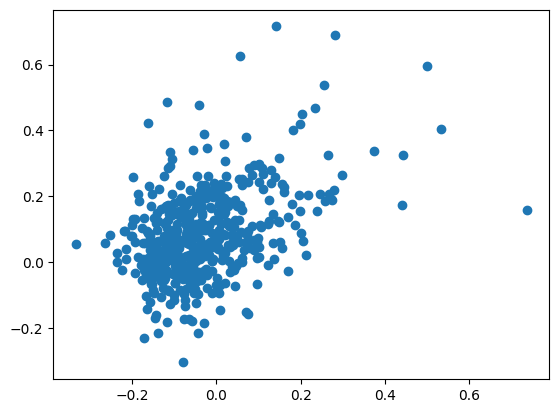

In [37]:
plt.scatter(dataset["semantic_similarity_mean_origin"],dataset["correlation_occurence"])
dataset[["semantic_similarity_mean_origin","correlation_occurence"]].corr()

,semantic_similarity_hobby_origin,correlation_occurence
semantic_similarity_hobby_origin,1.00000,0.37051
correlation_occurence,0.37051,1.00000


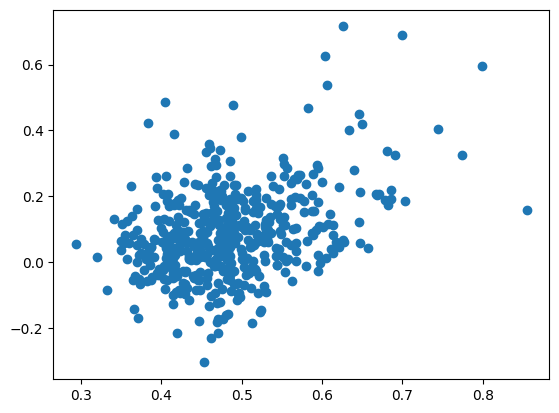

In [38]:
plt.scatter(dataset["semantic_similarity_hobby_origin"],dataset["correlation_occurence"])
dataset[["semantic_similarity_hobby_origin","correlation_occurence"]].corr()

In [43]:
mod = smf.ols(formula='avg_abs_diff ~ semantic_similarity', data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_abs_diff   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     56.01
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.34e-13
Time:                        14:58:39   Log-Likelihood:                -517.63
No. Observations:                 496   AIC:                             1039.
Df Residuals:                     494   BIC:                             1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7157    

In [44]:
mod = smf.ols(formula='avg_abs_diff ~ semantic_similarity_mean_origin', data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_abs_diff   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     48.07
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.29e-11
Time:                        14:58:42   Log-Likelihood:                -521.24
No. Observations:                 496   AIC:                             1046.
Df Residuals:                     494   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [45]:
mod = smf.ols(formula='avg_abs_diff ~ semantic_similarity_hobby_origin', data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_abs_diff   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     79.77
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           8.34e-18
Time:                        14:58:44   Log-Likelihood:                -507.15
No. Observations:                 496   AIC:                             1018.
Df Residuals:                     494   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

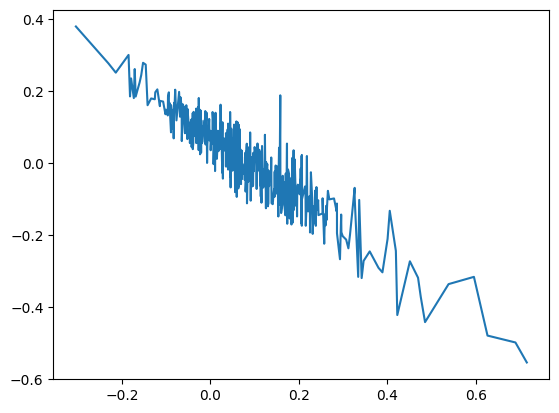

In [54]:
# TO ENTER MANUALLY
y_pred = mod.predict(params=[-0.0500,0.4960]) 
y_pred.shape

y_true = dataset["correlation_occurence"].values
y_true.shape

y_true_id = np.argsort(y_true)
y_pred = y_pred[y_true_id]
y_true = y_true[y_true_id]

error = y_pred - y_true

plt.plot(y_true, error) 

In [55]:
for row_id in range(len(dataset)):
    print(dataset.iloc[y_true_id].iloc[row_id].values)

[0.25170937180519104 -0.30393860917511467 1.3161786445384274
 'Reading <-> Cars']
[0.19370833039283752 -0.23064292801562822 1.0731781591237308
 'Physics <-> Shopping']
[0.17515693604946136 -0.21370561605261848 0.8041215487330878
 'PC <-> Reading']
[0.17609117925167084 -0.21361885408787448 0.11714456240473645
 'Physics <-> Celebrities']
[0.3324768841266632 -0.18486747200221781 0.6605219959512862
 'Cars <-> Theatre']
[0.10696592926979065 -0.18154236170083163 0.4923900839433745
 'Economy Management <-> Chemistry']
[0.21256984770298004 -0.17907978623879106 0.3759855596459456
 'PC <-> Theatre']
[0.11487022787332535 -0.17296776432485977 0.39601679246788585
 'Economy Management <-> Biology']
[0.28157979249954224 -0.1709282204654755 0.6955448884197281
 'Cars <-> Writing']
[0.13192160427570343 -0.16874021110320261 0.7099073383225049
 'Reading <-> Passive sport']
[0.2284117490053177 -0.1599071975298368 0.7941197038652137
 'Mathematics <-> Shopping']
[0.27785390615463257 -0.1561586168916732 0.269

In [56]:
len(dataset)

496

### Based on absolute difference 

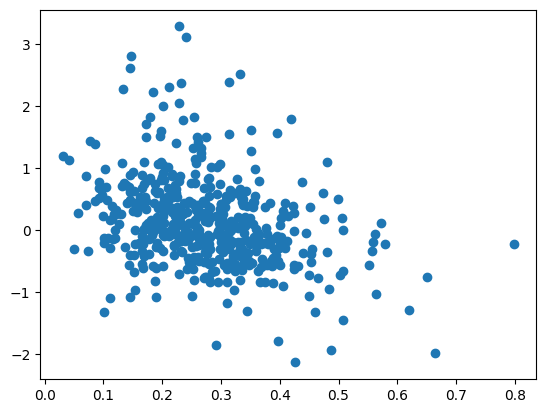

In [57]:
plt.scatter(dataset["semantic_similarity"],dataset["avg_abs_diff"])

In [58]:
mod = smf.ols(formula='avg_abs_diff ~ semantic_similarity', data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           avg_abs_diff   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     56.01
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.34e-13
Time:                        14:42:36   Log-Likelihood:                -517.63
No. Observations:                 496   AIC:                             1039.
Df Residuals:                     494   BIC:                             1048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7157    

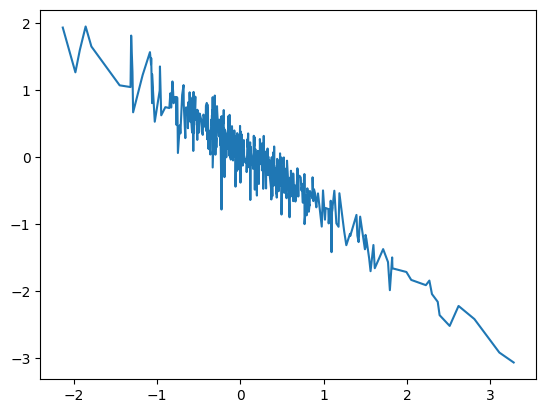

In [59]:
y_pred = mod.predict(params=[0.7157,-2.1622])
y_pred.shape

y_true = dataset["avg_abs_diff"].values
y_true.shape

y_true_id = np.argsort(y_true)
y_pred = y_pred[y_true_id]
y_true = y_true[y_true_id]

error = y_pred - y_true

plt.plot(y_true, error) 

### Data augmentation

PageRank, Node strength (also called degree), Closeness centrality, betweenness centrality, random walk + proba of passing the edge, 

## Clustering

https://caam37830.github.io/book/05_graphs/spectral.html

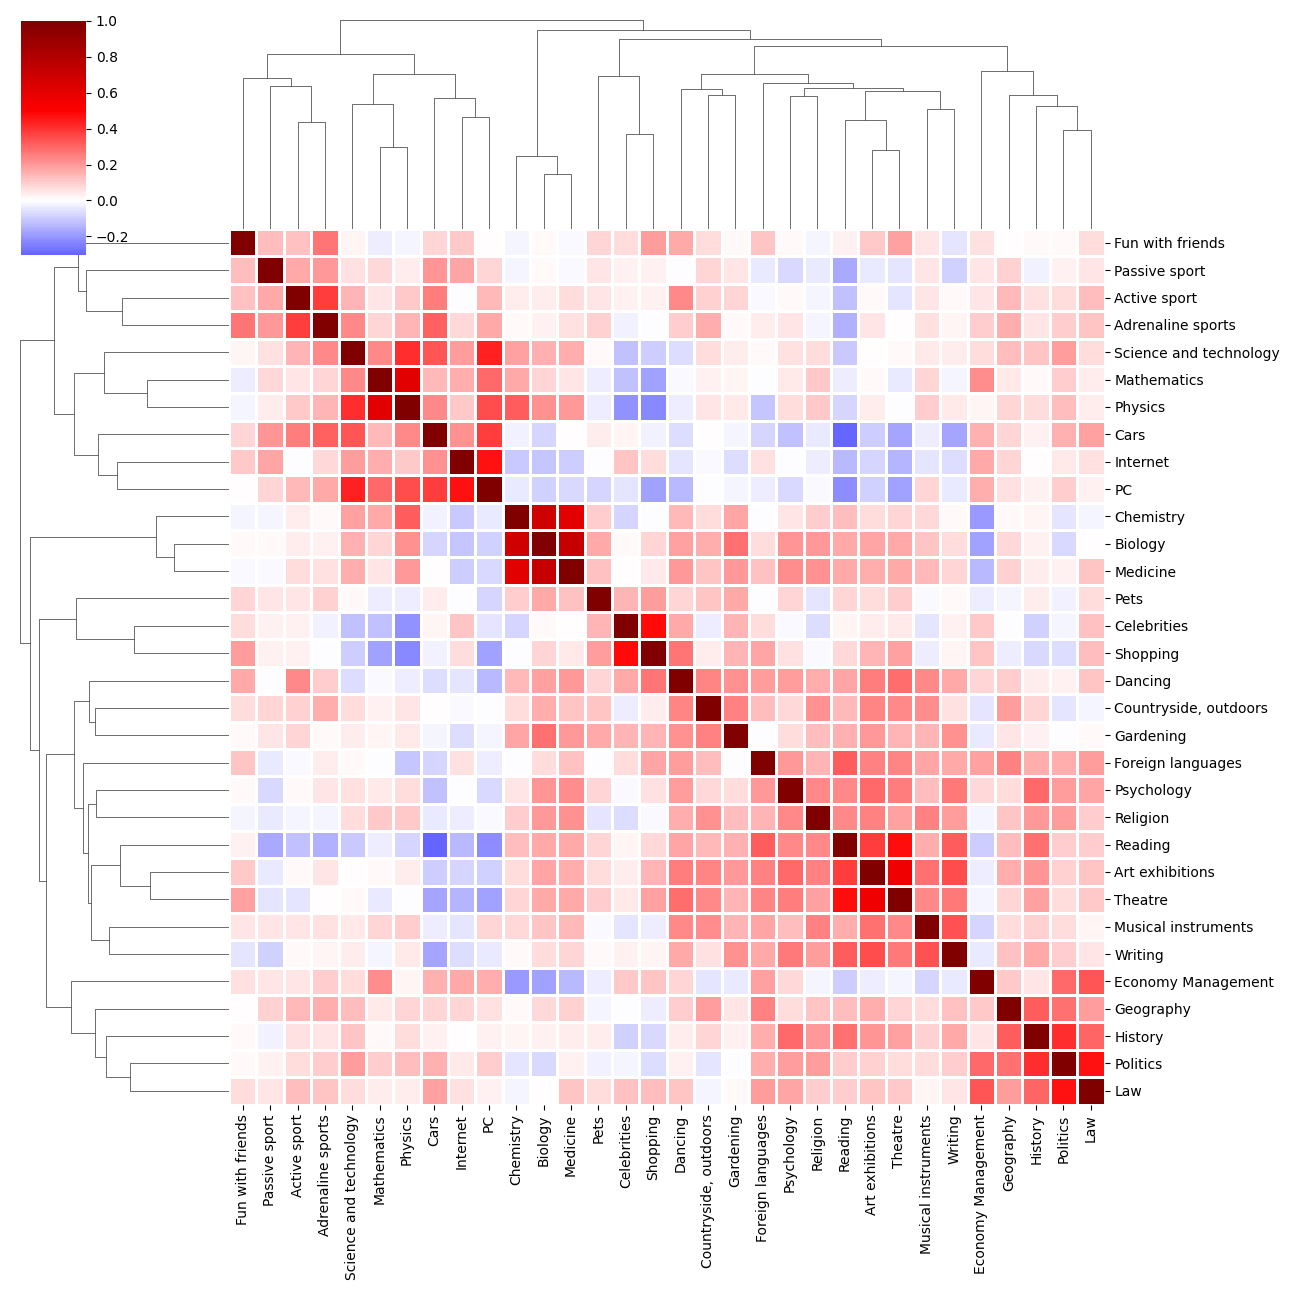

In [61]:
sns.clustermap(data[variable_groups["hobbies"]].dropna(axis=0).corr(), center=0, cmap="seismic",
                             linewidths=.75, figsize=(13, 13))

### PCA

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
X_hobbies = data[variable_groups["hobbies"]].dropna(axis=0).values
X_hobbies

array([[1., 5., 1., ..., 5., 4., 4.],
       [1., 3., 4., ..., 4., 2., 5.],
       [1., 2., 1., ..., 5., 5., 5.],
       ...,
       [2., 3., 3., ..., 3., 1., 5.],
       [3., 5., 3., ..., 5., 1., 4.],
       [2., 3., 1., ..., 5., 2., 5.]])

In [64]:
n_components = len(hobby_names) - 2
pca = PCA(n_components=n_components)
pca.fit(X_hobbies)
print(pca.explained_variance_ratio_)

[0.13544799 0.10479068 0.08063201 0.06946438 0.05273425 0.04286766
 0.04094587 0.03457081 0.0330224  0.03203322 0.02858578 0.02790116
 0.02637219 0.02556872 0.02287498 0.02230709 0.02090546 0.01967975
 0.01890299 0.01870482 0.01676079 0.01558494 0.01492138 0.01457642
 0.0131472  0.01233027 0.01150779 0.01002716 0.00894522 0.00866793]


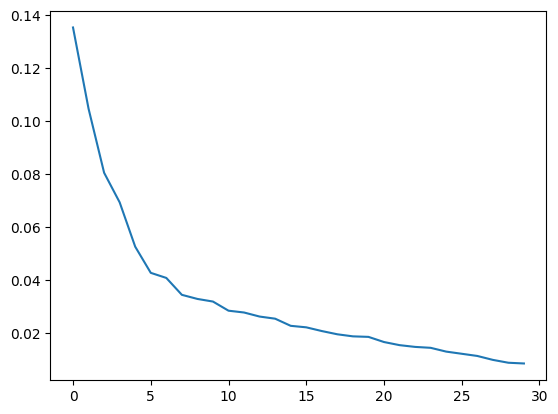

In [65]:
plt.plot(np.arange(n_components), pca.explained_variance_ratio_)

# should use Kaiser criterion to know how many components to include, can be used in addition to KMeans for clustering


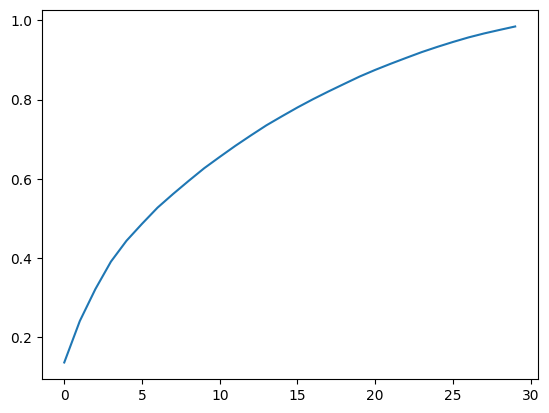

In [96]:
plt.plot(np.arange(n_components), np.cumsum(pca.explained_variance_ratio_))

In [102]:
loadings = (pca.components_.T * np.sqrt(pca.explained_variance_))

In [104]:
pd.DataFrame(loadings,index=hobby_names)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
History,0.462462,0.196203,-0.442853,-0.340161,-0.300966,-0.460446,0.205377,0.081659,-0.065403,0.035984,...,-0.165477,0.412708,0.043724,-0.200660,-0.143897,-0.235976,0.026849,0.170659,0.016064,-0.001335
Psychology,0.601594,0.009578,-0.192543,-0.146632,-0.199127,-0.046353,0.016351,-0.215843,-0.107801,0.176020,...,-0.184848,-0.202034,-0.168650,0.089434,0.150367,0.120499,-0.023611,-0.179284,-0.002858,-0.034163
Politics,0.287174,0.445153,-0.589054,-0.306373,-0.494349,-0.213098,-0.066396,0.135989,-0.101191,0.303745,...,0.171327,-0.127002,-0.186655,0.315134,-0.242418,0.321963,0.159835,0.021333,-0.048618,-0.033182
Mathematics,0.105963,0.668674,0.189570,-0.422129,-0.052102,0.585592,-0.003188,-0.372291,0.526091,0.179345,...,-0.125022,-0.024057,-0.014593,0.084987,-0.018781,-0.089631,-0.022891,0.105842,-0.305575,-0.176074
Physics,0.191958,0.729476,0.378918,-0.407384,-0.009764,0.266505,0.090027,-0.282037,0.161197,0.011887,...,-0.088598,-0.121772,0.106719,0.018893,0.062981,0.038257,0.121016,0.024338,0.440583,0.247307
Internet,-0.132168,0.307495,-0.127409,0.025522,-0.048956,0.291728,0.069228,0.168607,-0.044438,-0.153513,...,0.205225,0.035360,0.153532,0.015993,0.034231,0.120469,0.113190,0.039107,-0.323612,0.354993
PC,-0.216593,0.826154,-0.039855,-0.243448,0.138589,0.412756,0.165489,0.070644,-0.326928,-0.240323,...,0.416416,0.088467,0.093473,0.009000,0.038006,0.058065,0.105518,-0.034597,0.161500,-0.272121
Economy Management,-0.076496,0.391053,-0.639604,0.058166,-0.440455,0.440909,-0.313347,-0.172617,0.277993,0.168743,...,-0.038011,0.257925,-0.192710,-0.331074,-0.033228,0.072002,-0.055300,0.000105,0.088052,0.088246
Biology,0.795935,0.118253,0.866413,0.179047,-0.283183,-0.050234,-0.157460,0.151339,-0.017781,-0.024571,...,0.050359,0.089206,-0.046350,-0.047831,0.018975,0.019486,-0.022093,-0.036088,0.023033,0.016638
Chemistry,0.596926,0.206827,0.936826,0.031000,-0.283261,-0.054318,-0.179937,0.028193,0.024498,-0.020301,...,-0.007563,0.216510,0.112757,-0.067663,-0.195059,0.115736,-0.016054,-0.412302,-0.087093,-0.026720


### Spectral clustering

In [66]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.sparse as sparse
import scipy.sparse.linalg as sla

#### on correlation occurence

In [67]:
G = nx.Graph()
for i in range(len(hobby_names)):
    G.add_node(i,name=hobby_names[i])
    for j in range(i+1,len(hobby_names)):
        G.add_node(j,name=hobby_names[j])
        G.add_edge(i, j, weight= corr_matrix[i,j])

print(G.nodes(data=True))
print(G.edges(data=True))

[(0, {'name': 'History'}), (1, {'name': 'Psychology'}), (2, {'name': 'Politics'}), (3, {'name': 'Mathematics'}), (4, {'name': 'Physics'}), (5, {'name': 'Internet'}), (6, {'name': 'PC'}), (7, {'name': 'Economy Management'}), (8, {'name': 'Biology'}), (9, {'name': 'Chemistry'}), (10, {'name': 'Reading'}), (11, {'name': 'Geography'}), (12, {'name': 'Foreign languages'}), (13, {'name': 'Medicine'}), (14, {'name': 'Law'}), (15, {'name': 'Cars'}), (16, {'name': 'Art exhibitions'}), (17, {'name': 'Religion'}), (18, {'name': 'Countryside, outdoors'}), (19, {'name': 'Dancing'}), (20, {'name': 'Musical instruments'}), (21, {'name': 'Writing'}), (22, {'name': 'Passive sport'}), (23, {'name': 'Active sport'}), (24, {'name': 'Gardening'}), (25, {'name': 'Celebrities'}), (26, {'name': 'Shopping'}), (27, {'name': 'Science and technology'}), (28, {'name': 'Theatre'}), (29, {'name': 'Fun with friends'}), (30, {'name': 'Adrenaline sports'}), (31, {'name': 'Pets'})]
[(0, 1, {'weight': 0.2863095113332165}

In [68]:
G.get_edge_data(2,0), corr_matrix[2,0]

({'weight': 0.4007855511561761}, 0.4007855511561761)

In [69]:
lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float64), which='SM')
x = V[:,2]
cs = x < 0 # get clusters

In [70]:
lam, V[:,:3] #Fiedler vector: take the 2nd smallest eigenvalue... Why is one negative?  

(array([-2.69679579e-01,  6.45967654e-16,  1.71032104e-01,  9.35055526e-01,
         1.20642436e+00,  1.41982662e+00]),
 array([[-0.0374584 , -0.1767767 , -0.09719932],
        [-0.11759081, -0.1767767 , -0.07961352],
        [ 0.04939814, -0.1767767 , -0.05706055],
        [ 0.15386063, -0.1767767 , -0.1526994 ],
        [ 0.1255064 , -0.1767767 , -0.19840143],
        [ 0.34007159, -0.1767767 ,  0.14330128],
        [ 0.41499802, -0.1767767 , -0.06534985],
        [ 0.191243  , -0.1767767 ,  0.12181172],
        [-0.13318938, -0.1767767 , -0.10231645],
        [-0.10924546, -0.1767767 , -0.16294226],
        [-0.28988229, -0.1767767 , -0.10982204],
        [ 0.00574291, -0.1767767 , -0.056263  ],
        [-0.09564269, -0.1767767 , -0.00916151],
        [-0.11043093, -0.1767767 , -0.09884163],
        [ 0.01435069, -0.1767767 ,  0.01019974],
        [ 0.40693349, -0.1767767 ,  0.05485528],
        [-0.14169913, -0.1767767 , -0.06123028],
        [-0.09660645, -0.1767767 , -0.12267449]

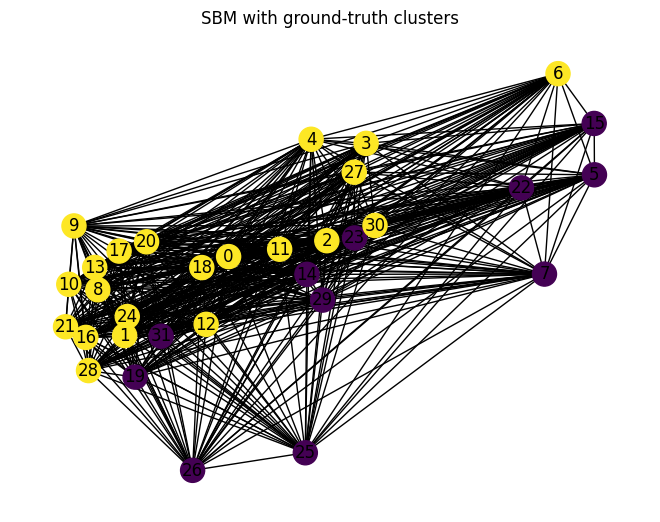

In [71]:
#nx.draw_kamada_kawai(G, with_labels=False)
nx.draw_spring(G, with_labels = True, node_color = cs)
plt.title("SBM with ground-truth clusters")
plt.show()

according to https://www.kaggle.com/code/pro7work/clustering-young-people-on-interests, should be 6 clusters BUT the guy used the original data of hobbies and then PCA

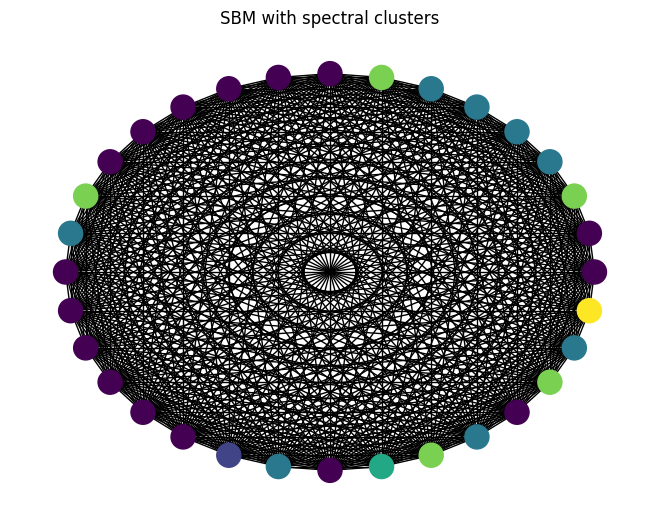

In [75]:
corr_cs = KMeans(n_clusters=6).fit_predict(V[:,[0,2,3,4,5]]) # get clusters

nx.draw_circular(G, with_labels=False, node_color=corr_cs)
plt.title("SBM with spectral clusters")
plt.show()

In [201]:
corr_cs

array([0, 0, 0, 0, 0, 1, 1, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 2, 4, 0, 0, 4, 0, 4], dtype=int32)

In [202]:
for i in np.unique(corr_cs):
    hobby_cluster = np.where(corr_cs == i)[0]
    print(f"-- cluster {i} --")
    for hobby_id in hobby_cluster:
        print(hobby_names[hobby_id])
    print("---")

-- cluster 0 --
History
Psychology
Politics
Mathematics
Physics
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Art exhibitions
Religion
Countryside, outdoors
Dancing
Musical instruments
Writing
Active sport
Gardening
Science and technology
Theatre
Adrenaline sports
---
-- cluster 1 --
Internet
PC
---
-- cluster 2 --
Celebrities
---
-- cluster 3 --
Passive sport
---
-- cluster 4 --
Cars
Shopping
Fun with friends
Pets
---
-- cluster 5 --
Economy Management
---


In [203]:
hobby_names

['History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets']

#### on semantic similarity 

In [204]:
G = nx.Graph()
for i in range(len(hobby_names)):
    G.add_node(i,name=hobby_names[i])
    for j in range(i+1,len(hobby_names)):
        G.add_node(j,name=hobby_names[j])
        G.add_edge(i, j, weight= similarity_matrix[i,j])

print(G.nodes(data=True))
print(G.edges(data=True))

[(0, {'name': 'History'}), (1, {'name': 'Psychology'}), (2, {'name': 'Politics'}), (3, {'name': 'Mathematics'}), (4, {'name': 'Physics'}), (5, {'name': 'Internet'}), (6, {'name': 'PC'}), (7, {'name': 'Economy Management'}), (8, {'name': 'Biology'}), (9, {'name': 'Chemistry'}), (10, {'name': 'Reading'}), (11, {'name': 'Geography'}), (12, {'name': 'Foreign languages'}), (13, {'name': 'Medicine'}), (14, {'name': 'Law'}), (15, {'name': 'Cars'}), (16, {'name': 'Art exhibitions'}), (17, {'name': 'Religion'}), (18, {'name': 'Countryside, outdoors'}), (19, {'name': 'Dancing'}), (20, {'name': 'Musical instruments'}), (21, {'name': 'Writing'}), (22, {'name': 'Passive sport'}), (23, {'name': 'Active sport'}), (24, {'name': 'Gardening'}), (25, {'name': 'Celebrities'}), (26, {'name': 'Shopping'}), (27, {'name': 'Science and technology'}), (28, {'name': 'Theatre'}), (29, {'name': 'Fun with friends'}), (30, {'name': 'Adrenaline sports'}), (31, {'name': 'Pets'})]
[(0, 1, {'weight': 0.3872756361961365}

In [205]:
lam, V = sla.eigsh(nx.laplacian_matrix(G).astype(np.float64), which='SM') # 6 eigenvalues by default...
x = V[:,1]
cs = x < 0 # get clusters

In [206]:
lam, V

(array([-9.55226812e-16,  5.42944617e+00,  6.29894795e+00,  6.43704028e+00,
         6.51951054e+00,  6.55303074e+00]),
 array([[-1.76776695e-01,  1.71926174e-04, -1.32680941e-02,
         -3.31952692e-02, -1.71890800e-02, -8.00797502e-03],
        [-1.76776695e-01, -1.08134104e-02, -6.17702006e-02,
         -6.41051335e-02,  3.68583195e-03, -2.73917718e-02],
        [-1.76776695e-01, -7.48400799e-04, -1.04581725e-02,
         -4.86655846e-02, -9.87479313e-03, -5.87078597e-03],
        [-1.76776695e-01, -8.37920307e-03, -4.65410137e-02,
         -1.82182249e-02,  3.96738336e-03, -1.51748375e-02],
        [-1.76776695e-01, -3.22446225e-02, -7.74480268e-02,
         -5.56560402e-02,  1.93458118e-02, -1.85422901e-02],
        [-1.76776695e-01, -2.52138010e-02, -7.40414808e-03,
         -3.58661900e-02, -3.65296830e-02,  3.28152010e-02],
        [-1.76776695e-01, -6.23128161e-02, -9.71476797e-02,
         -2.28745044e-01, -5.29917949e-01,  4.96886072e-01],
        [-1.76776695e-01,  9.6792

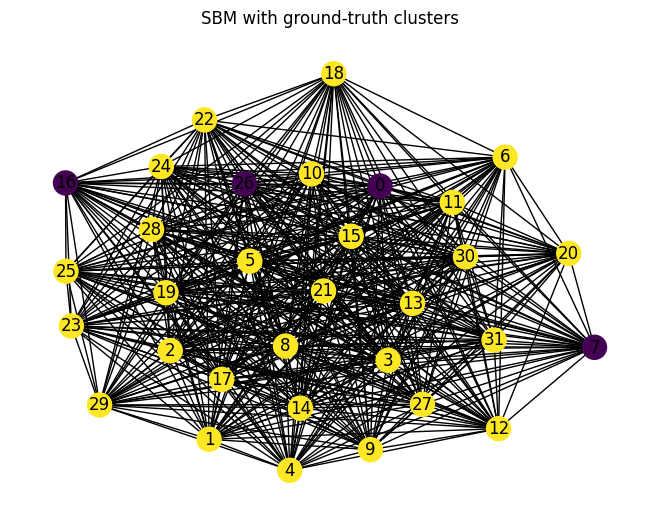

In [207]:
#nx.draw_kamada_kawai(G, with_labels=False)
nx.draw_spring(G, with_labels = True, node_color = cs)
plt.title("SBM with ground-truth clusters")
plt.show()

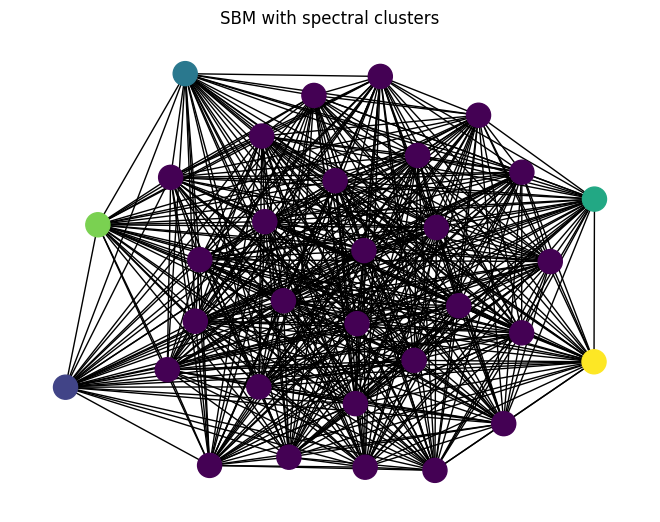

In [234]:
sim_cs = KMeans(n_clusters=6).fit_predict(V[:,1:]) # get clusters

nx.draw_spring(G, with_labels=False, node_color=sim_cs)
plt.title("SBM with spectral clusters")
plt.show()

In [235]:
for i in np.unique(sim_cs):
    hobby_cluster = np.where(sim_cs == i)[0]
    print(f"-- cluster {i} --")
    for hobby_id in hobby_cluster:
        print(hobby_names[hobby_id])
    print("---")

-- cluster 0 --
History
Psychology
Politics
Mathematics
Physics
Internet
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Religion
Dancing
Writing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Adrenaline sports
Pets
---
-- cluster 1 --
Economy Management
---
-- cluster 2 --
Countryside, outdoors
---
-- cluster 3 --
Musical instruments
---
-- cluster 4 --
Art exhibitions
---
-- cluster 5 --
PC
---


#### Compare clustering results

In [236]:
from sklearn import metrics

metrics.adjusted_rand_score(sim_cs, corr_cs)

0.09882524722904361

At the core, the problem I'm reaching is comparing two graphs which shouldn't reeaaalllyyy be the case... Try:
1. Pull out features from all
2. Pull out features only from clusters based on well-being (n friends, happy life...)
3. See whether those features differ or not. Use t-test, regression analysis for that 


What we are saying is:
1. if someone doesn't do the same activities as he is supposed to (normalized by people who do enjoy their lives), then they are unhappy. Don't know what causes which though
2. semantic similarity helps detecting the way people engage with activities: share a common structure... Cluster, centrality, page rank, Zipf distribution...

Try waltrap clustering, exactly what I want about rumination